# dataset

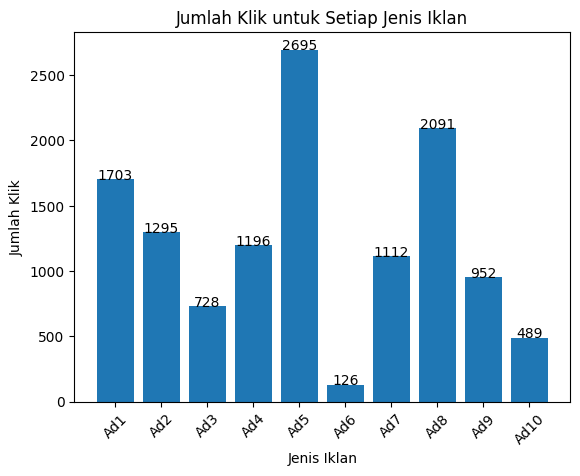

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset
df = pd.read_csv("Ads_CTR_Optimisation.csv")

# Menghitung jumlah klik untuk setiap jenis iklan
click_counts = df.sum(axis=0)

# Menyiapkan data untuk plot
jenis_iklan = [f'Ad{i}' for i in range(1, 11)]  # Asumsikan iklan dinamai Iklan-1 hingga Iklan-10
jumlah_klik = click_counts.values

# Membuat bar plot
plt.bar(jenis_iklan, jumlah_klik)
plt.xlabel('Jenis Iklan')
plt.ylabel('Jumlah Klik')
plt.title('Jumlah Klik untuk Setiap Jenis Iklan')
plt.xticks(rotation=45)  # Untuk memudahkan membaca label jenis iklan

# Menambahkan nilai sebenarnya jumlah klik pada barplot
for i in range(len(jenis_iklan)):
    plt.text(i, jumlah_klik[i], jumlah_klik[i], ha = 'center')

plt.show()


# epsilon greedy

Epsilon: 0.1
Average Total Reward: 2450.044
Average Regret: [0.094      0.535      0.35666667 ... 0.49730046 0.49734613 0.4973956 ]
Min CTR:  1859.0
Max CTR:  2592.0
Optimal Ad for epsilon 0.1: 5


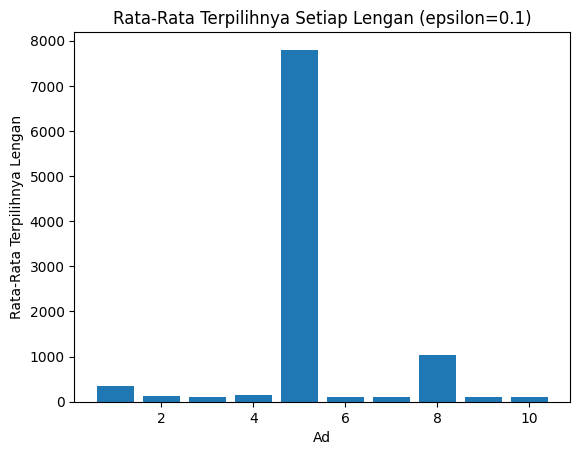

------------------------------------------------
Epsilon: 0.075
Average Total Reward: 2447.28
Average Regret: [0.038      0.514      0.34266667 ... 0.49757892 0.49762276 0.497672  ]
Min CTR:  1800.0
Max CTR:  2614.0
Optimal Ad for epsilon 0.075: 5


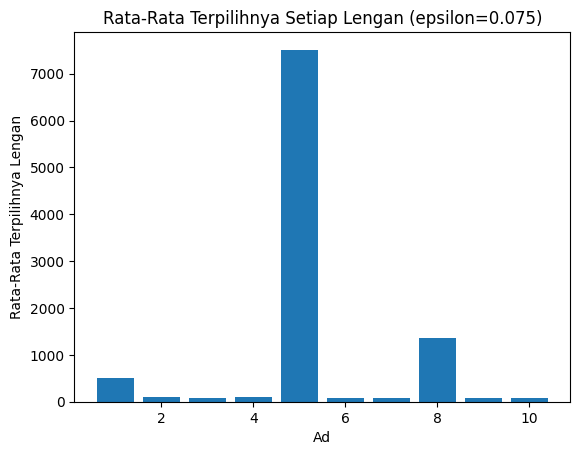

------------------------------------------------
Epsilon: 0.05
Average Total Reward: 2433.206
Average Regret: [0.036      0.511      0.34066667 ... 0.4989912  0.4990297  0.4990794 ]
Min CTR:  1543.0
Max CTR:  2632.0
Optimal Ad for epsilon 0.05: 5


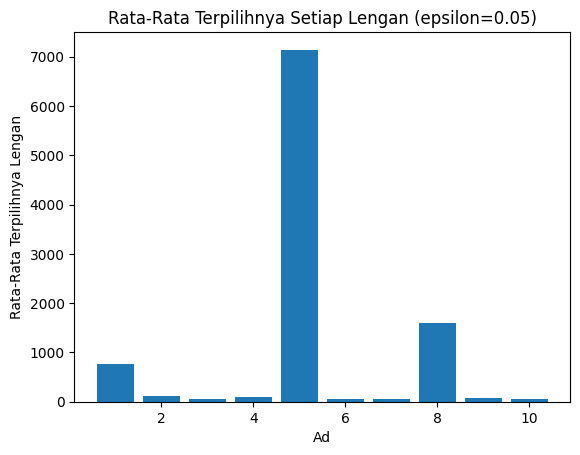

------------------------------------------------
Epsilon: 0.025
Average Total Reward: 2357.76
Average Regret: [0.018      0.507      0.338      ... 0.50654631 0.50657486 0.506624  ]
Min CTR:  1175.0
Max CTR:  2666.0
Optimal Ad for epsilon 0.025: 5


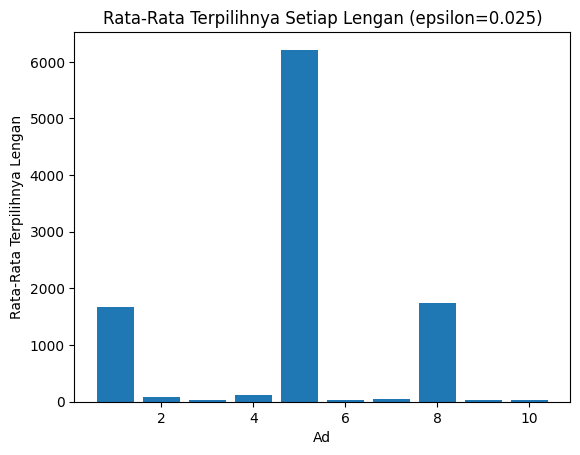

------------------------------------------------


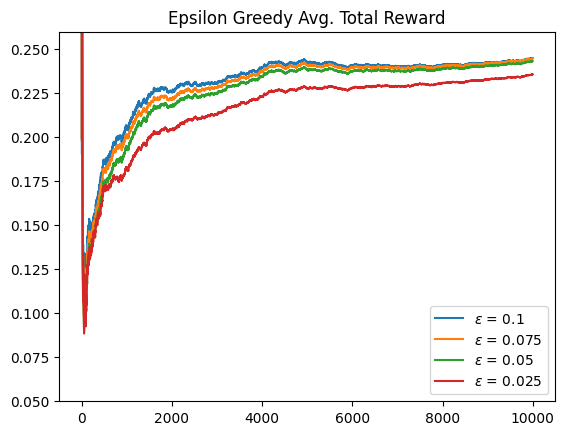

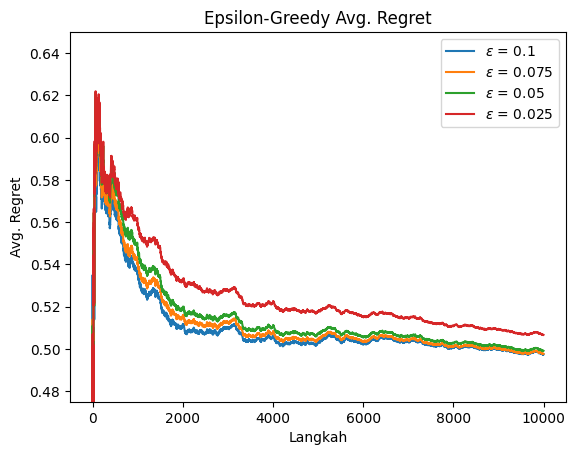

Running time = 12.764325841666668 menit


In [2]:
import numpy as np
import pandas as pd
import timeit
import matplotlib.pyplot as plt
import random
from scipy import stats

def choose_ad():
    if np.random.uniform() < epsilon:
        return random.randrange(num_ads)
    else:
        max_val = np.max(q_values)
        return np.argmax(q_values)

awal = timeit.default_timer()

df = pd.read_csv("D:/Tugas Akhir/dataset/Ads_CTR_Optimisation.csv")
ads = df.values
num_ads = ads.shape[1]
num_Langkahs = ads.shape[0]

epsilons = [0.1, 0.075, 0.05, 0.025]
avg_total_rewards = []
avg_regrets = []
avg_reward_records = []

for epsilon in epsilons:
    total_rewards = np.zeros(500)
    regrets = np.zeros((500, num_Langkahs))
    reward_records = []
    ad_choices = np.zeros((500, num_ads))  # Initialize the array to keep track of ad choices

    for run in range(500):
        q_values = np.zeros(num_ads)
        n_values = np.zeros(num_ads)
        total_reward = 0
        regret = 0

        reward_record = [0] * num_Langkahs
        for i in range(num_Langkahs):
            ad_chosen = choose_ad()
            ad_choices[run, ad_chosen] += 1  # Increment the count for the chosen ad

            reward = ads[i, ad_chosen]
            total_reward += reward

            n_values[ad_chosen] += 1
            q_values[ad_chosen] += (reward - q_values[ad_chosen]) / n_values[ad_chosen]

            optimal_reward = ads[i].max()
            regret += optimal_reward - reward
            regrets[run, i] = regret / (i + 1)

            reward_record[i] = total_reward / (i + 1)

        total_rewards[run] = total_reward
        reward_records.append(reward_record)

    avg_total_reward = total_rewards.mean()
    avg_regret = regrets.mean(axis=0)

    avg_total_rewards.append(avg_total_reward)
    avg_regrets.append(avg_regret)

    avg_reward_record = [sum(x) / len(x) for x in zip(*reward_records)]
    avg_reward_records.append(avg_reward_record)

    print("Epsilon:", epsilon)
    print("Average Total Reward:", avg_total_reward)
    print("Average Regret:", avg_regret)
    print ('Min CTR: ', min(total_rewards))
    print ('Max CTR: ', max(total_rewards))
    print(f"Optimal Ad for epsilon {epsilon}: {np.argmax(q_values)+1}")
    
    # After each epsilon loop, calculate the average number of choices for each ad and create the bar plot
    avg_ad_choices = ad_choices.mean(axis=0)
    plt.bar(range(1, num_ads+1), avg_ad_choices)
    plt.xlabel('Ad')
    plt.ylabel('Rata-Rata Terpilihnya Lengan')
    plt.title(f'Rata-Rata Terpilihnya Setiap Lengan (epsilon={epsilon})')
    plt.show()

    print('------------------------------------------------')

# Plot rata-rata reward
for i in range(len(epsilons)):
    plt.plot(avg_reward_records[i], label=f'$\epsilon$ = {epsilons[i]}')
plt.title("Epsilon Greedy Avg. Total Reward")
plt.legend()
plt.ylim(0.05, 0.26)  # Set batas sumbu y
plt.show()

# Plot rata-rata regret
for i in range(len(epsilons)):
    plt.plot(avg_regrets[i], label=f'$\epsilon$ = {epsilons[i]}')
plt.title("Epsilon-Greedy Avg. Regret")
plt.xlabel('Langkah')
plt.ylabel('Avg. Regret')
plt.legend()
plt.ylim(0.475, 0.65)  # Set batas sumbu y
plt.show()

akhir = timeit.default_timer()
print("Running time =", (akhir - awal) / 60, "menit")


# adaptive epsilon greedy

## 1 time

Total CTR: 2642


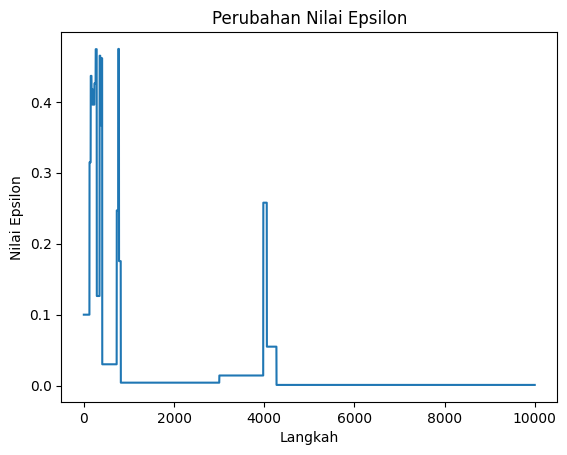

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Read the dataset from the CSV file
df = pd.read_csv("D:/Tugas Akhir/dataset/Ads_CTR_Optimisation.csv")

# Number of ads
num_ads = 10

# Parameter l dan f
l = 10
f = 7

# Initialize Q-values for each ad
Q_values = np.zeros(num_ads)

# Initialize epsilon and a list to store epsilon values
epsilon = 0.1
epsilon_values = [epsilon]
epsilon_history = [0.1]

# To store the results of ad selection at each time step
selected_ads = []

# To count how many times each ad is selected
ad_counts = np.zeros(num_ads)

# Initialize variables for calculating epsilon
max_prev = Q_values.copy()
k = 0

# Total click-through rate (CTR)
total_CTR = 0

# Number of impressions (rounds)
num_rounds = len(df)

# Lists to store cumulative rewards for each epsilon value
avg_rewards = []

for t in range(num_rounds):
    if np.random.rand() <= epsilon:
        # Exploration mode: Choose an ad randomly
        ad = np.random.choice(num_ads)
        k += 1
        if k == l:
            max_curr = np.max(Q_values)
            delta = (max_curr - max_prev[ad]) * f
            if delta > 0:
                epsilon = (1 / (1 + math.exp(-2 * delta))) - 0.5
            elif delta < 0:
                epsilon = 0.5
            max_prev[ad] = max_curr
            k = 0
            
            # Append the new epsilon value to the list
            epsilon_values.append(epsilon)
    else:
        # Exploitation mode: Choose the ad with the highest Q-value
        ad = np.argmax(Q_values)
    epsilon_history.append(epsilon)
    selected_ads.append(ad)
    reward = df.values[t, ad]
    
    # Update Q-value for the selected ad and add reward to total_CTR
    Q_values[ad] += (reward - Q_values[ad]) / (ad_counts[ad] + 1)
    ad_counts[ad] += 1
    
    total_CTR += df.values[t, ad]
    
    # Calculate average reward so far and add it to the list
    avg_reward_so_far = total_CTR / (t + 1)
    avg_rewards.append(avg_reward_so_far)

# Print the total Click-Through Rate (CTR)
print(f"Total CTR: {total_CTR}")


# Plot epsilon values over time (similar to the previous program)
plt.plot(range(len(epsilon_history)), epsilon_history)
plt.xlabel("Langkah")
plt.ylabel("Nilai Epsilon")
plt.title("Perubahan Nilai Epsilon")
plt.show()

## 500 times

Average Total CTR: 2471.85
Min CTR:  1185
Max CTR:  2684


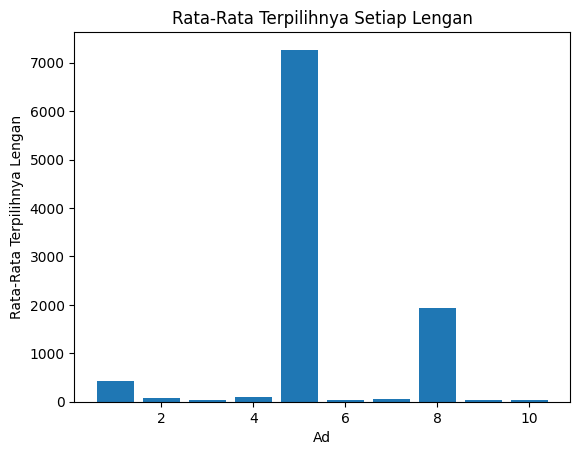

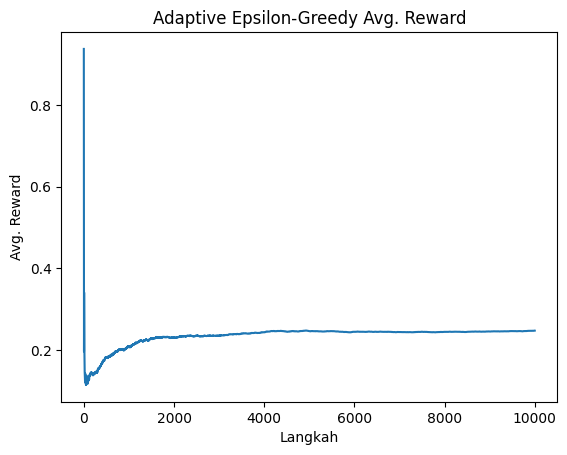

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import stats

def choose_ad():
    if np.random.uniform() < epsilon:
        return random.randrange(num_ads)
    else:
        max_val = np.max(q_values)
        return np.argmax(q_values)

df = pd.read_csv("D:/Tugas Akhir/dataset/Ads_CTR_Optimisation.csv")
ads = df.values
num_ads = ads.shape[1]
num_Langkahs = ads.shape[0]

l = 10
f = 7

total_CTRs = []
all_avg_rewards = []

# Initialize an array to store the number of times each ad is chosen
ad_choices = np.zeros((500, num_ads))

for run in range(500):
    Q_values = np.zeros(num_ads)
    epsilon = 0.1
    selected_ads = []
    ad_counts = np.zeros(num_ads)
    max_prev = Q_values.copy()
    k = 0

    total_CTR = 0
    num_rounds = len(df)
    avg_rewards = []

    for t in range(num_rounds):
        if np.random.rand() <= epsilon:
            ad = np.random.choice(num_ads)
            k += 1
            if k == l:
                max_curr = np.max(Q_values)
                delta = (max_curr - max_prev[ad]) * f
                if delta > 0:
                    epsilon = (1 / (1 + math.exp(-2 * delta))) - 0.5
                elif delta < 0:
                    epsilon = 0.5
                max_prev[ad] = max_curr
                k = 0
                
        else:
            ad = np.argmax(Q_values)

        # Increment the count for the chosen ad
        ad_choices[run, ad] += 1

        selected_ads.append(ad)
        reward = df.values[t, ad]
        
        Q_values[ad] += (reward - Q_values[ad]) / (ad_counts[ad] + 1)
        ad_counts[ad] += 1
        
        total_CTR += df.values[t, ad]
        
        avg_reward_so_far = total_CTR / (t + 1)
        avg_rewards.append(avg_reward_so_far)

    total_CTRs.append(total_CTR)
    all_avg_rewards.append(avg_rewards)

avg_total_CTR = np.mean(total_CTRs)
avg_avg_rewards = np.mean(all_avg_rewards, axis=0)

print(f"Average Total CTR: {avg_total_CTR}")
print('Min CTR: ', min(total_CTRs))
print('Max CTR: ', max(total_CTRs))

# Calculate the average number of choices for each ad and create the bar plot
avg_ad_choices = ad_choices.mean(axis=0)
plt.bar(range(1, num_ads+1), avg_ad_choices)
plt.xlabel('Ad')
plt.ylabel('Rata-Rata Terpilihnya Lengan')
plt.title('Rata-Rata Terpilihnya Setiap Lengan')
plt.show()

plt.plot(range(num_rounds), avg_avg_rewards)
plt.xlabel("Langkah")
plt.ylabel("Avg. Reward")
plt.title("Adaptive Epsilon-Greedy Avg. Reward")
plt.show()


# A/B/n testing

Rata-rata total reward selama 500 kali running: 2442.81
Min CTR:  1171
Max CTR:  2582


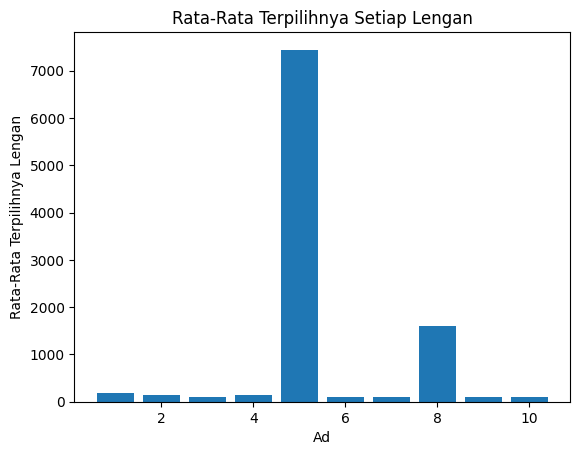

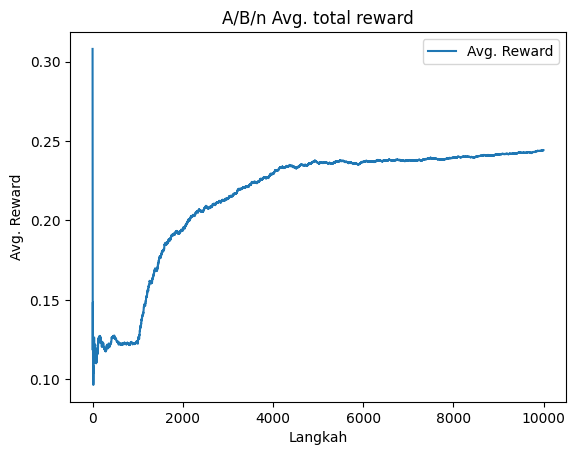

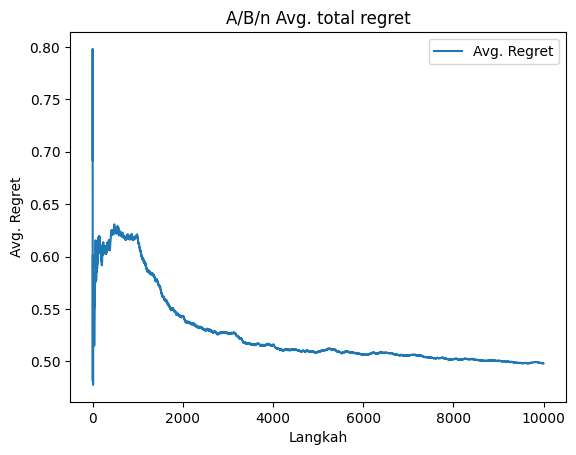

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv("D:/Tugas Akhir/dataset/Ads_CTR_Optimisation.csv")
ads = df.values.tolist()
n_ads = len(ads[0])

n_test = 1000
n_prod = 9000
loop = 500
avg_total_rewards = []  # menyimpan average total rewards setiap run
avg_rewards_all = []
avg_regred_AB_all = []

# Initialize an array to store the number of times each ad is chosen
ad_choices = np.zeros((loop, n_ads))

for run in range(loop):
    Q = np.zeros(n_ads)  # Q, action values
    N = np.zeros(n_ads)  # N, total impressions
    total_reward = 0
    avg_rewards = []  # menyimpan sata-rata reward 
    avg_regred_AB = []
    total_regret = 0

    # A/B/n test
    for i in range(n_test):
        ad_chosen = np.random.randint(n_ads)
        R = ads[i][ad_chosen]  
        N[ad_chosen] += 1
        Q[ad_chosen] += (1 / N[ad_chosen]) * (R - Q[ad_chosen])
        total_reward += R
        avg_rewards.append(total_reward / (i+1))
        
        optimal_reward = max(ads[i])
        total_regret += optimal_reward - R
        avg_regred_AB.append(total_regret / (i+1))

        # Increment the count for the chosen ad
        ad_choices[run, ad_chosen] += 1

    avg_reward_so_far = total_reward / n_test

    best_ad_index = np.argmax(Q)  # mencari lengan terbaik


    ad_chosen = best_ad_index

    for i in range(n_prod):
        if i+n_test < len(ads):
            R = ads[i+n_test][ad_chosen]
            total_reward += R
            avg_rewards.append(total_reward / (n_test + i + 1))
            
            optimal_reward = max(ads[i+n_test])
            total_regret += optimal_reward - R
            avg_regred_AB.append(total_regret / (n_test + i + 1))

            # Increment the count for the chosen ad
            ad_choices[run, ad_chosen] += 1

    avg_total_rewards.append(total_reward)
    avg_rewards_all.append(avg_rewards)
    
    avg_regred_AB_all.append(avg_regred_AB)

print("Rata-rata total reward selama {} kali running: {:.2f}".format(loop, np.mean(avg_total_rewards)))
print('Min CTR: ', min(avg_total_rewards))
print('Max CTR: ', max(avg_total_rewards))

# Calculate the average number of choices for each ad and create the bar plot
avg_ad_choices = ad_choices.mean(axis=0)
plt.bar(range(1, n_ads+1), avg_ad_choices)
plt.xlabel('Ad')
plt.ylabel('Rata-Rata Terpilihnya Lengan')
plt.title('Rata-Rata Terpilihnya Setiap Lengan')
plt.show()

# Plot rata-rata rewards dan regrets
plt.plot(np.mean(avg_rewards_all, axis=0), label="Avg. Reward")
plt.title("A/B/n Avg. total reward")
plt.xlabel('Langkah')
plt.ylabel('Avg. Reward')
plt.legend()
plt.show()

plt.plot(np.mean(avg_regred_AB_all, axis=0), label="Avg. Regret")
plt.title("A/B/n Avg. total regret")
plt.xlabel('Langkah')
plt.ylabel('Avg. Regret')
plt.legend()
plt.show()


# Perbandingan

## Average total reward

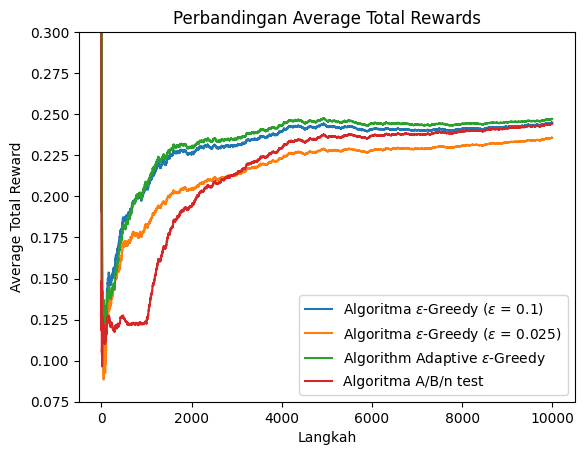

In [6]:
# plt.figure(figsize=(12, 6))
plt.plot(avg_reward_records[0], label= "Algoritma $\epsilon$-Greedy ($\epsilon$ = 0.1)")
plt.plot(avg_reward_records[3], label= "Algoritma $\epsilon$-Greedy ($\epsilon$ = 0.025)")
plt.plot(avg_avg_rewards, label='Algorithm Adaptive $\epsilon$-Greedy')
plt.plot(np.mean(avg_rewards_all, axis=0), label="Algoritma A/B/n test")
plt.xlabel('Langkah')
plt.ylabel('Average Total Reward')
plt.title('Perbandingan Average Total Rewards')
plt.legend()
plt.ylim(0.075, 0.3)
plt.show()


## Regret

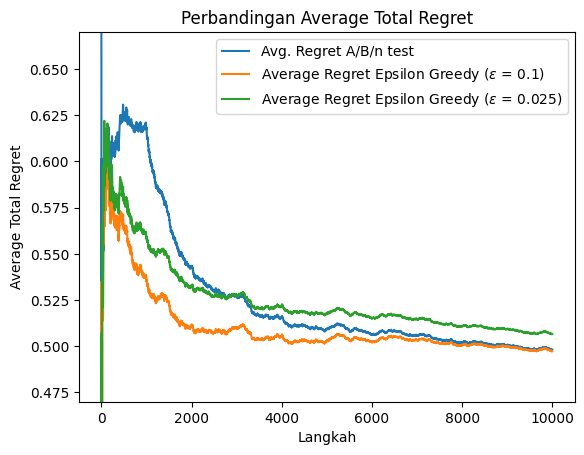

In [7]:
# plt.figure(figsize=(12, 6))
#plt.plot(avg_regrets_mean, label="Avg. Regret")
plt.plot(np.mean(avg_regred_AB_all, axis=0), label="Avg. Regret A/B/n test")
plt.plot(avg_regrets[0], label= 'Average Regret Epsilon Greedy ($\epsilon$ = 0.1)')
plt.plot(avg_regrets[3], label= 'Average Regret Epsilon Greedy ($\epsilon$ = 0.025)')
plt.xlabel('Langkah')
plt.ylabel('Average Total Regret')
plt.title('Perbandingan Average Total Regret')
plt.legend()
plt.ylim(0.47, 0.67)
plt.show()

# print

In [8]:
akhir = timeit.default_timer()
print("Running time =", (akhir - awal) / 60, "menit")

Running time = 15.969066721666668 menit
